## Análisis y Visualizción - Mentoría - Review de productos en Amazon

### Ulises Dascalakis

Mail : ulises.dasca@live.com.ar

### Alejandro Bernal

Mail : alejandro@alejandro.bio

### Presentación: <a href="https://docs.google.com/presentation/d/186sn-p9yqiaRcpSIFJzCVnW95iy8sUpnP-z9yZA2LYk/edit?usp=sharing" target="_blank">Enlace a la presentación</a>


In [344]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [345]:
dataset = pd.read_csv('data_review.csv')

### 1 Analizar la consistencia/inconsistencia de los datos.

In [346]:
### Listamos los nombres de las columnas
list(dataset.columns.values)

['rating', 'title', 'review', 'target']

### La columna 'rating' : Representa datos categoricos del 1 al 5  y no contiene datos nulos

In [347]:
### Describiendo los datos de rating
dataset['rating'].describe()

count    100000.000000
mean          3.975310
std           1.496717
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [348]:
### Describiendo los datos de la columna title
dataset['title'].describe()

count         99999
unique        87206
top       Excellent
freq            228
Name: title, dtype: object

## Análisis de valores nulos

In [349]:
### Evaluando si hay datos nulos
rating_is_null = dataset['rating'].isnull().values.any()
target_is_null = dataset['target'].isnull().values.any()
print('rating_is_null: ' + str(rating_is_null))
print('target_is_null: ' + str(target_is_null))

rating_is_null: False
target_is_null: True


Conclusión: No hay valores Nulos en Rating pero si en Target.

In [350]:
#Contamos los valores nulos de target
target_null = list(dataset['target'].isnull()).count(True)
#Contamos los valores no nulos de target
target_not_null = list(dataset['target'].isnull()).count(False)
#Validamos si la cantidad de valores nulos y no nulos es lo mismo que el total de registros
target_null + target_not_null == dataset['target'].shape[0]

True

### Cantidad de Reviews por Rating

Text(0.5, 1.0, 'Cantidad Por Rating')

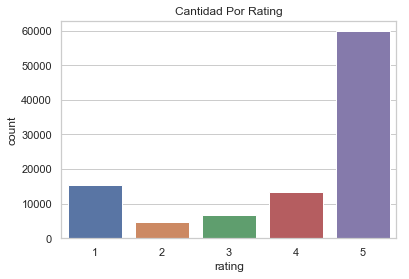

In [351]:
sns.countplot(data=dataset, x='rating').set_title('Cantidad Por Rating')

Conclusión: Podemos visualizar que la mayor cantidad de reviews tienen un Rating alto. Podemos decir que los usuarios que completan reviews tienden a responder de manera positiva.

### La columna 'title' : Representa los titulos de la Review y solo tiene un dato vacio

In [352]:
### Mostrando los primeros los datos de la columna title
dataset['title'].head()

0    .............Am I in Midgard anymore ?
1     Zip wax new formula is just horrible.
2                   Apatow's Depth Triumphs
3                               Dream of C.
4                           it doesnt suck.
Name: title, dtype: object

In [353]:
### Evaluando si hay datos nulos
dataset['title'].isnull().sum()

1

### La columna 'review' : Representa a la descripción en si de la review y no contiene datos vacios

In [354]:
### Evaluando los datos de la columna review
dataset['review'].head()

0    I was so disappointed to find she has not writ...
1    I've been using zip wax for many years. It was...
2    I am a stand-up fanatic. I enjoy the alternati...
3    It is to bad such talented illustrations are i...
4    this product doesnt vaccum out the air I was d...
Name: review, dtype: object

In [355]:
### Evaluando los datos de la columna review
dataset['review'].describe()

count                                                100000
unique                                                99999
top       Very cheap and half the price then buying from...
freq                                                      2
Name: review, dtype: object

In [356]:
### Evaluando los datos de la columna review
dataset['review'].isnull().sum()

0

### La columna 'target' : Representa datos categoricos booleanos y 6775 contiene datos vacios

In [357]:
### Evaluando los datos de la columna review
dataset['target'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: target, dtype: float64

In [358]:
### Evaluando los datos de la columna review
dataset['target'].describe()

count    93225.000000
mean         0.785036
std          0.410799
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [359]:
### Evaluando los datos de la columna review
dataset['target'].isnull().sum()

6775

### 1.1 En caso de presentarse faltantes, que decisión tomaría para su tratamiento. ¿Porqué?

#### Se presentan faltantes en los campos

* ##### Si hay faltantes, sobre todo en el campo Target
* ##### Dado que al parecer los valores nulos son a proposito puesto que dividen al dataset en dos porque son los que tienen un rating de 3, destimariamos los registros con esos valores para futuros analisis

#### Evaluando información de los datos faltantes

* Todo campo nulo en target tiene un valor de rating = 3
* Todo rating = 3 tiene un valor nulo en target
* un rating de 3 parece dar lugar a una división binaria en el dataset
* Contrastamos a las campos 'rating' y 'target' pues son los datos categoricos que pueden tener relación

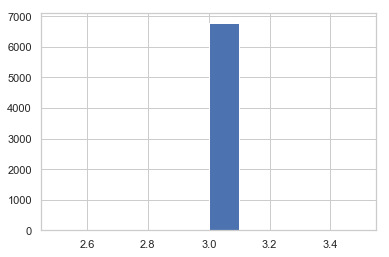

In [360]:
dataset[dataset['target'].isnull()]['rating'].hist()

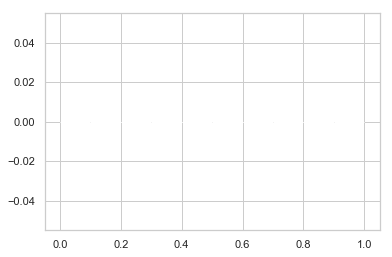

In [361]:
dataset[dataset['rating'] == 3]['target'].hist()

* Todo valor de target es 0 cuando el rating es menor a 3

* Todo valor de target es 1 cuando el rating es mayor a 3

#### Analizando al valor de rating para todo target diferente de nulo

In [362]:
dataset[dataset['target'] != '']['rating'].hist()

C:\Users\Ulises\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [ ]:
dataset.corr()

In [ ]:
## Graficando distribución de los ratings
plt.title('Distribución de Rating')
plt.ylabel('Cantidad por Rating')
sns.distplot(dataset['rating'])

Cada valor de la columna rating tiene la misma probabilidad ya que puede tomar los valores preestablecidos del 1 al 5. Los valores fuera de este rango nunca ocurren entonces encontramos una <b>distribución de probabilidad uniforme.</b>

### 2.3 ¿Qué información se puede encontrar entre las distintas clases de rating?

* #### Son muchas más las reviews con rating alto "5"
* #### Las reviews con rating muy bajo son un poco más que las reviews con rating de 4

### Target VS Rating

Analizamos la relación entre los valores de Rating y Target

In [ ]:
sns.scatterplot(x="rating", y="target", data=dataset).set_title("Target vs Rating")

Conclusión: Podemos visualizar que target 1 se da en valores de rating mayores a 3 y para los rating menores de 3 se da un valor de target 0. En conclusión todos los ratings con valores mayores a 3, son de target positivo.

### Outliers

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["rating"]).set_title("Rating Outliers")

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["target"]).set_title("Target Outliers")

Conclusión: El dataset no presenta outliers, las variables target y rating son variables categóricas y pueden contener valores acotados 1 o 0 para target y entre 1 y 5 para rating. Representamos estos atributos en un boxplot para visualizar la inexistencia de outliers. 
